In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 

import requests
import io

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dates = pd.date_range('2020-01-22', periods=63, freq='D')
n=0
df = pd.DataFrame()
while n<=62:
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' +dates[n].strftime('%m-%d-%Y')+ '.csv'
    tmp = pd.read_csv(url)
    df = df.append(tmp)
    n = n+1    

In [3]:
df.head()

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN,NaN
3,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Fujian,NaN,NaN
4,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Gansu,NaN,NaN


In [4]:
cols = ['Country/Region','Country_Region','Province/State','Last Update','Last_Update','Confirmed','Deaths','Recovered']
df["Country/Region"] = df["Country/Region"].combine_first(df["Country_Region"])
df["Last_Update"] = df["Last Update"].combine_first(df["Last_Update"])
cols = ['Country/Region','Province/State','Last_Update','Confirmed','Deaths','Recovered']
df = df[cols]

In [5]:
df["Last_Update"] = pd.to_datetime(df["Last_Update"]).dt.strftime('%Y-%m-%d')
df.head()

,Country/Region,Province/State,Last_Update,Confirmed,Deaths,Recovered
0,Mainland China,Anhui,2020-01-22,1.0,NaN,NaN
1,Mainland China,Beijing,2020-01-22,14.0,NaN,NaN
2,Mainland China,Chongqing,2020-01-22,6.0,NaN,NaN
3,Mainland China,Fujian,2020-01-22,1.0,NaN,NaN
4,Mainland China,Gansu,2020-01-22,NaN,NaN,NaN


In [6]:
df.shape

(17866, 6)

In [7]:
# check missing values
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
3,Confirmed,19
5,Recovered,388
4,Deaths,441
1,Province/State,13508


In [8]:
cols = ['Confirmed','Deaths','Recovered']
df[df["Last_Update"]=='2020-03-24'][cols].sum(axis = 0, skipna = True).astype(int)

Confirmed    410908
Deaths        18550
Recovered    100735
dtype: int32

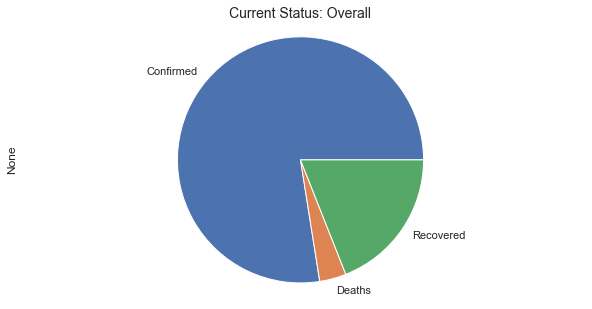

In [9]:
# pie plot for current status
fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[df["Last_Update"]=='2020-03-24'][cols].sum(axis = 0, skipna = True).astype(int).plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

plt.title('Current Status: Overall', fontsize=14)
plt.show()

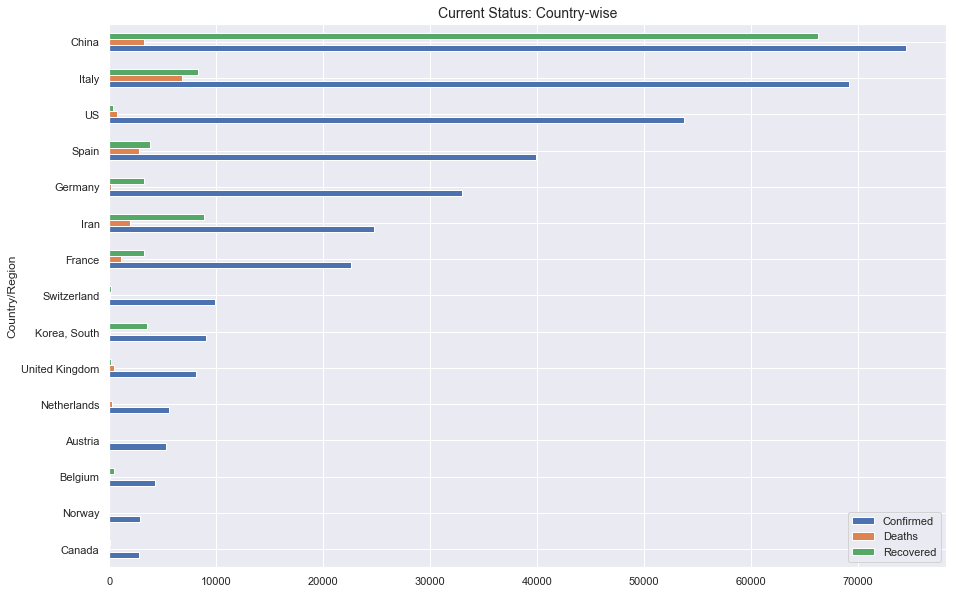

In [10]:
# bar plot for current status
tmp = df[df["Last_Update"]=='2020-03-24'].groupby(['Country/Region']).sum().sort_values(by=['Confirmed'], ascending=True)[-15:]
tmp.plot(kind='barh', figsize=(15,10))
plt.title('Current Status: Country-wise', fontsize=14)

plt.show()

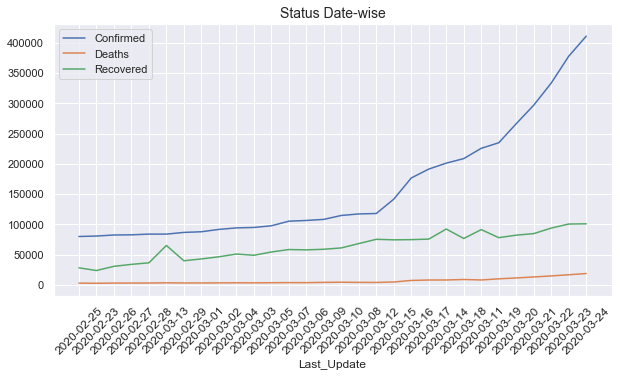

In [11]:
# Detection State-wise
tmp = df.groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()

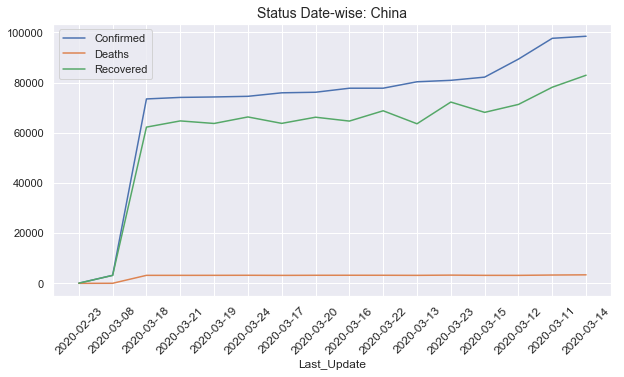

In [12]:
# Detection State-wise
tmp = df[df['Country/Region']=='China'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: China', fontsize=14)
plt.show()

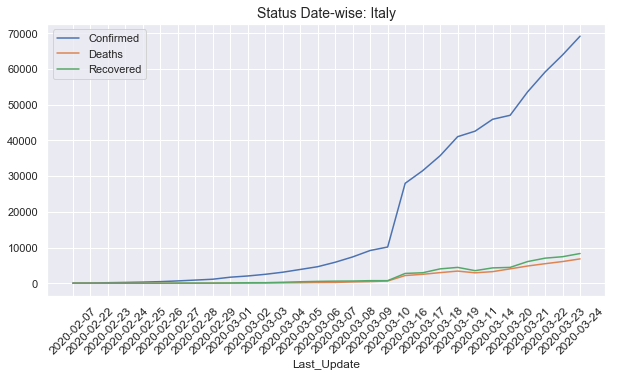

In [13]:
# Detection State-wise
tmp = df[df['Country/Region']=='Italy'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: Italy', fontsize=14)
plt.show()

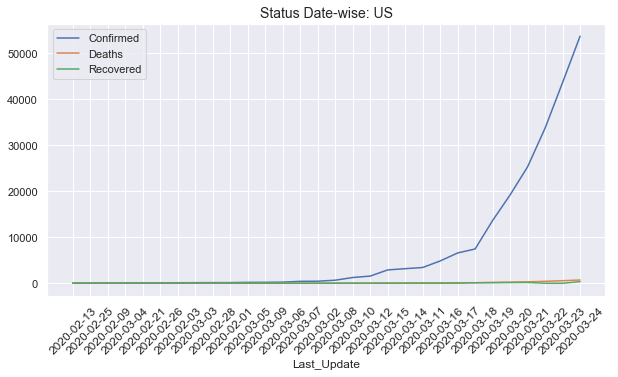

In [14]:
# Detection State-wise
tmp = df[df['Country/Region']=='US'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: US', fontsize=14)
plt.show()

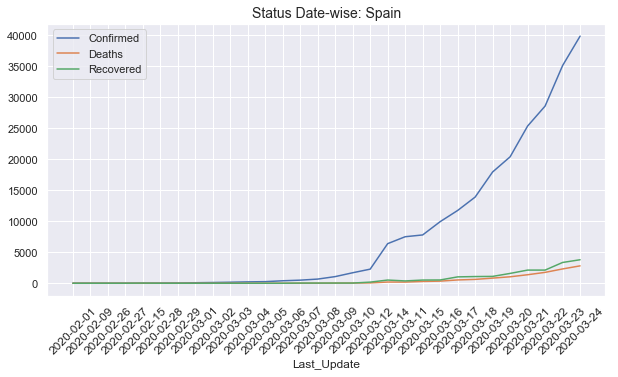

In [15]:
# Detection State-wise
tmp = df[df['Country/Region']=='Spain'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: Spain', fontsize=14)
plt.show()

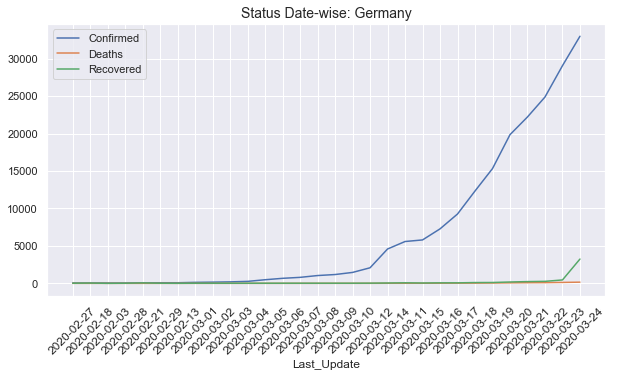

In [16]:
# Detection State-wise
tmp = df[df['Country/Region']=='Germany'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: Germany', fontsize=14)
plt.show()

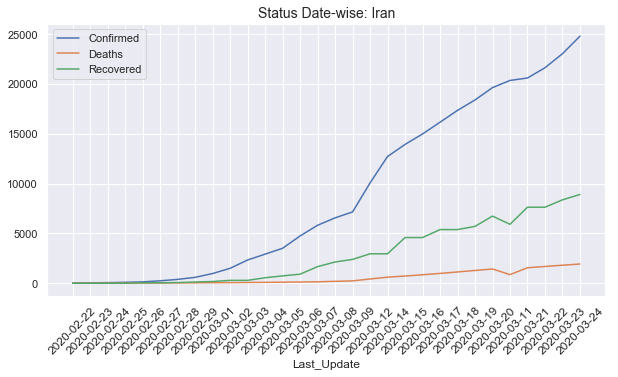

In [17]:
# Detection State-wise
tmp = df[df['Country/Region']=='Iran'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: Iran', fontsize=14)
plt.show()

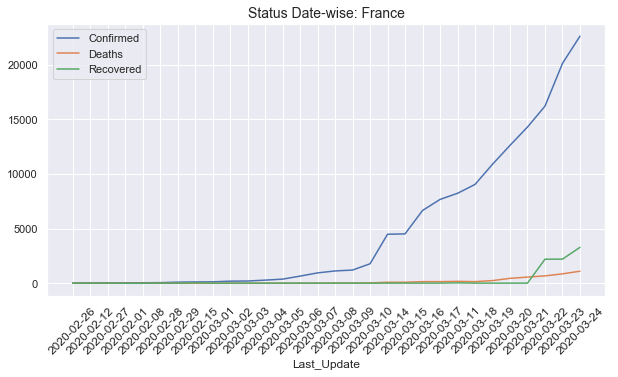

In [18]:
# Detection State-wise
tmp = df[df['Country/Region']=='France'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: France', fontsize=14)
plt.show()

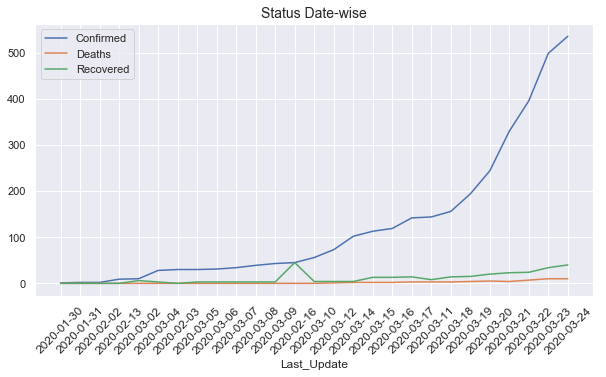

In [19]:
# Detection State-wise
tmp = df[df['Country/Region']=='India'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()